In [4]:
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as m
import sympy as sp
from sympy import symbols
from sympy import sympify
from sympy import *
import random
import pandas as pd 

In [23]:
# Co-ordinates of corners of default rectangle
A = np.array([0.45,0.075,0.1])
B = np.array([0.45,-0.075,0.1])
C = np.array([0.25,-0.075,0.1])
D = np.array([0.25,0.075,0.1])

In [139]:
# User input co-ordinates of [A,B,C,D]
A1=np.zeros((3,1))
B1=np.zeros((3,1))
C1=np.zeros((3,1))
D1=np.zeros((3,1))

#Input co-ordinates of A
for j in range(3):
  A1[j]= input('Co-ordinates of A: ')

for j in range(3):
  B1[j]= (input('Co-ordinates of B: ')) 

for j in range(3):
  C1[j]= (input('Co-ordinates of C: ')) 

for j in range(3):
  D1[j]= (input('Co-ordinates of D: ')) 
  
print(A,B,C,D)  

Co-ordinates of A: 0.4
Co-ordinates of A: 0.08
Co-ordinates of A: 0.1
Co-ordinates of B: 0.43
Co-ordinates of B: 0.085
Co-ordinates of B: 0.1
Co-ordinates of C: 0.35
Co-ordinates of C: 0.07
Co-ordinates of C: 0.12
Co-ordinates of D: 0.41
Co-ordinates of D: 0.075
Co-ordinates of D: 0.1


Co-ordinates for Task 1-c

In [144]:
A2 = np.array([0.4,0.06,0.1])
B2 = np.array([0.4,0.01,0.1])
C2 = np.array([0.35,0.01,0.1])
D2 = np.array([0.35,0.06,0.1])

Co-ordinates for Task 1-e

In [148]:
A3 = np.array([0.4,0.06,0.15])
B3 = np.array([0.4,0.01,0.15])
C3 = np.array([0.35,0.01,0.15])
D3 = np.array([0.35,0.06,0.15])

Variable computing related to Task 1d: Compute joint variables at each junction for given velocity.

-> Constant End-effector velocity: 0.01 m/s in linear direction. Thus first we need to compute all junction points in the trajectory of A-B-C-D-A. In all junction points Z co-ordinate is fixed (0.1m).

In [179]:
# Path A-B 
i=0
x=0.45
y=0.075
z=0.1
n1=(0.075+(0.075)/0.01)
X=[]
Y=[]
Z=[]

# Path A-B
while y> 0.01:
  X.append(0.4)
  Y.append(0.06-(i*0.01))
  Z.append(0.1)
  y=0.06-(i*0.01)
  i=i+1 

# Path B-C
j=0
while x>= 0.35:
  X.append(0.4-(j*0.01))
  Y.append(0.01)
  Z.append(0.1)
  x=0.4-(j*0.01)
  j=j+1  

#Path C-D
k=0
while y< 0.06:
  X.append(0.35)
  Y.append(0.01+(k*0.01))
  Z.append(0.1)
  y=0.01+(k*0.01)
  k=k+1 

#Path D-A
l=0
while x< 0.4:
  X.append(0.35+(l*0.01))
  Y.append(0.06)
  Z.append(0.1)
  x=0.35+(l*0.01)
  l=l+1  

XX=np.array(X)
YY=np.array(Y)
ZZ=np.array(Z)

**SCARA Robot**

Defining function for forward and inverse kinematics.

In [87]:
def scara_invkin(X,l0,l1,l2):
    x= X[0]
    y= X[1]
    z= X[2]
    # using formulae from the textbook
    #r = ((x**2+y**2-l1**2-l2**2)/(2*l1*l2))
    #theta2 = np.arctan2(np.sqrt(1-r**2),r)
    #theta1 = np.arctan2(y,x) - np.arctan2((l2*np.sin(theta2)),(l1+l2*np.cos(theta2)))
    #d3 = l0-z
    r = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
    if r>1 or r<-1:
        print("outside workspace")
    theta2 = np.arctan2(np.sqrt(1-r**2),r)
    theta1 = np.arctan2(y,x) - np.arctan2((l2*np.sin(theta2)),(l1+l2*np.cos(theta2)))
    d3 = l0-z
    
    # converting from radians to degrees
    theta1 = theta1*180/np.pi
    theta2 = theta2*180/np.pi
    return theta1,theta2,d3
    
def scara_fwkin(X,l0,l1,l2):
    theta1= X[0]
    theta2= X[1]
    d3 = X[2]
    theta1= theta1*np.pi/180
    theta2=theta2*np.pi/180
    p0= np.array([[l1*np.cos(theta1)+ l2*np.cos(theta1+theta2)],
                  [l2*np.sin(theta1)+ l2*np.sin(theta1+theta2)],
                  [l0-d3]])
    return p0

Task 1a : Compute joint variables for 4 corners of rectangle & verify it by inverse kinematics approach.

In [90]:
[a1,b1,c1]= scara_invkin(A,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA= np.array([a1,b1,c1])

[a2,b2,c2]= scara_invkin(B,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB= np.array([a2,b2,c2])

[a3,b3,c3]= scara_invkin(C,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC= np.array([a3,b3,c3])

[a4,b4,c4]= scara_invkin(D,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD= np.array([a4,b4,c4])


Joint variables for A= [-14.696515095304628, 48.31767460666049, 0.15]
Joint variables for B= [-33.62115951135586, 48.31767460666049, 0.15]
Joint variables for C= [-75.23171134841033, 117.06493422883338, 0.15]
Joint variables for B= [-41.83322288042307, 117.06493422883338, 0.15]


In [91]:
pA= scara_fwkin(AA,0.25,0.25,0.25)
print(pA)

pB= scara_fwkin(BB,0.25,0.25,0.25)
print(pB)

pC= scara_fwkin(CC,0.25,0.25,0.25)
print(pC)

pD= scara_fwkin(DD,0.25,0.25,0.25)
print(pD)

[[0.45 ]
 [0.075]
 [0.1  ]]
[[ 0.45 ]
 [-0.075]
 [ 0.1  ]]
[[ 0.25 ]
 [-0.075]
 [ 0.1  ]]
[[0.25 ]
 [0.075]
 [0.1  ]]


Task 1b: User input co-ordinates for points [A,B,C,D]

In [141]:
[a1,b1,c1]= scara_invkin(A1,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA1= np.array([a1,b1,c1])

[a2,b2,c2]= scara_invkin(B1,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB1= np.array([a2,b2,c2])

[a3,b3,c3]= scara_invkin(C1,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC1= np.array([a3,b3,c3])

[a4,b4,c4]= scara_invkin(D1,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD1= np.array([a4,b4,c4])

pA= scara_fwkin(AA1,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= scara_fwkin(BB1,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= scara_fwkin(CC1,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= scara_fwkin(DD1,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [array([-24.01925413]), array([70.65837321]), array([0.15])]
Joint variables for B= [array([-17.57842158]), array([57.52035158]), array([0.15])]
Joint variables for C= [array([-33.13999424]), array([88.89985343]), array([0.13])]
Joint variables for B= [array([-23.1626497]), array([67.05794461]), array([0.15])]
Co-ordinate of A=  [[[0.4 ]]

 [[0.08]]

 [[0.1 ]]]
Co-ordinate of B=  [[[0.43 ]]

 [[0.085]]

 [[0.1  ]]]
Co-ordinate of C=  [[[0.35]]

 [[0.07]]

 [[0.12]]]
Co-ordinate of D=  [[[0.41 ]]

 [[0.075]]

 [[0.1  ]]]


Task 1 C: Find joint variables for given co-ordinates

In [147]:
[a1,b1,c1]= scara_invkin(A2,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA2= np.array([a1,b1,c1])

[a2,b2,c2]= scara_invkin(B2,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB2= np.array([a2,b2,c2])

[a3,b3,c3]= scara_invkin(C2,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC2= np.array([a3,b3,c3])

[a4,b4,c4]= scara_invkin(D2,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD2= np.array([a4,b4,c4])

pA= scara_fwkin(AA2,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= scara_fwkin(BB2,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= scara_fwkin(CC2,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= scara_fwkin(DD2,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [-27.475770490137332, 72.01307220017092, 0.15]
Joint variables for B= [-35.4139253154836, 73.6920429992965, 0.15]
Joint variables for C= [-43.91349624174205, 91.10014656671754, 0.15]
Joint variables for B= [-35.02031676483832, 89.49579063247985, 0.15]
Co-ordinate of A=  [[0.4 ]
 [0.06]
 [0.1 ]]
Co-ordinate of B=  [[0.4 ]
 [0.01]
 [0.1 ]]
Co-ordinate of C=  [[0.35]
 [0.01]
 [0.1 ]]
Co-ordinate of D=  [[0.35]
 [0.06]
 [0.1 ]]


Task 1D: Generate Joint Variable

In [194]:
# Inverse Kinematics
q11= np.zeros(len(X))
q22= np.zeros(len(X))
d33= np.zeros(len(X))
for i in range(len(X)): 
  AAA= np.array([[X[i]],[Y[i]],[Z[i]]])
  [q11[i],q22[i],d33[i]]= scara_invkin(AAA,0.25,0.25,0.25)

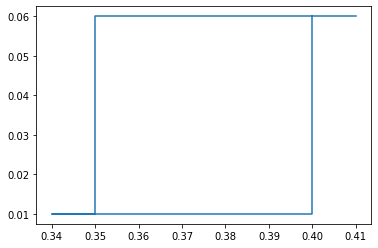

In [197]:
# Forward Kinematics
XX = np.zeros(len(X))
YY = np.zeros(len(X))
ZZ = np.zeros(len(X))

for i in range(len(X)):
  Q = np.array([[q11[i]],[q22[i]],[d33[i]]])
  [XX[i],YY[i],ZZ[i]]=  scara_fwkin(Q,0.25,0.25,0.25)
  

**Task 1(e & f)** : SCARA Robot doesn't require wrist for the given application. The reason for this is last link extension of SCARA is always perpendicular to the surface and it matches the requirement of the question. 

So now new end effector co-ordinate of the rectangle are are as follows:
A: (0.4,0.06,0.15)
B: (0.4,0.01,0.15)
C: (0.35,0.01,0.15)
     D: (0.35,0.06,0.15)

In [149]:
[a1,b1,c1]= scara_invkin(A3,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA3= np.array([a1,b1,c1])

[a2,b2,c2]= scara_invkin(B3,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB3= np.array([a2,b2,c2])

[a3,b3,c3]= scara_invkin(C3,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC3= np.array([a3,b3,c3])

[a4,b4,c4]= scara_invkin(D3,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD3= np.array([a4,b4,c4])

pA= scara_fwkin(AA3,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= scara_fwkin(BB3,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= scara_fwkin(CC3,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= scara_fwkin(DD3,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [-27.475770490137332, 72.01307220017092, 0.1]
Joint variables for B= [-35.4139253154836, 73.6920429992965, 0.1]
Joint variables for C= [-43.91349624174205, 91.10014656671754, 0.1]
Joint variables for B= [-35.02031676483832, 89.49579063247985, 0.1]
Co-ordinate of A=  [[0.4 ]
 [0.06]
 [0.15]]
Co-ordinate of B=  [[0.4 ]
 [0.01]
 [0.15]]
Co-ordinate of C=  [[0.35]
 [0.01]
 [0.15]]
Co-ordinate of D=  [[0.35]
 [0.06]
 [0.15]]


**Standford Robot**

Defining function for forward and inverse kinematics.

In [75]:
def stanford_invkin(P,l1,l2):    
    x=P[0]
    y=P[1]
    z=P[2] 
    r = (x**2 + y**2)**0.5
    t = (r**2 - l2**2)**0.5
    s=z-l1
    theta1 = np.arctan2(y,x) - np.arctan2(l2,t)
    theta2 = np.arctan2(np.cos(theta1)*x+np.sin(theta1)*y,z - l1)
    d3 = np.sin(theta2)*(np.cos(theta1)*x + np.sin(theta1)*y) + np.cos(theta2)*s
    return theta1,theta2,d3

def stanford_fwkin(X,l1,l2):
    theta1= X[0]
    theta2= X[1]
    d3 = X[2]
    #theta1=theta1*np.pi/180
    #theta2=theta2*np.pi/180
    p0=np.array([[d3*np.cos(theta1)*np.sin(theta2)- l2*np.sin(theta1)],
                 [d3*np.sin(theta1)*np.sin(theta2)+ l2*np.cos(theta1)],
                 [d3*np.cos(theta2)+l1]])
    print(p0)
    

Task 1a : Compute joint variables for 4 corners of rectangle & verify it by inverse kinematics approach.

In [76]:
[a1,b1,c1]= stanford_invkin(A,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA= np.array([a1,b1,c1])

[a2,b2,c2]= stanford_invkin(B,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB= np.array([a2,b2,c2])

[a3,b3,c3]= stanford_invkin(C,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC= np.array([a3,b3,c3])

[a4,b4,c4]= stanford_invkin(D,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD= np.array([a4,b4,c4])

Joint variables for A= [-0.41481867062111377, 1.9453169857298875, 0.4100304866714181]
Joint variables for B= [-0.7451160254503674, 1.9453169857298875, 0.4100304866714181]
Joint variables for C= [-1.5707963267948966, 2.677945044588987, 0.16770509831248423]
Joint variables for B= [-0.9878827378391623, 2.677945044588987, 0.16770509831248426]


In [104]:
pA= stanford_fwkin(AA,0.25,0.25)
print(pA)

pB= stanford_fwkin(BB,0.25,0.25)
print(pB)

pC= stanford_fwkin(CC,0.25,0.25)
print(pC)

pD= stanford_fwkin(DD,0.25,0.25)
print(pD)

[[-28.85226219]
 [ -1.33392202]
 [ 14.77356184]]
None
[[-28.8710299 ]
 [  0.83427437]
 [ 14.77356184]]
None
[[-52.02944646]
 [ 79.04134549]
 [ 47.93032457]]
None
[[-51.61108238]
 [-79.31515473]
 [ 47.93032457]]
None


Task 1b: User input co-ordinates for points [A,B,C,D]

In [142]:
[a1,b1,c1]= stanford_invkin(A1,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA1= np.array([a1,b1,c1])

[a2,b2,c2]= stanford_invkin(B1,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB1= np.array([a2,b2,c2])

[a3,b3,c3]= stanford_invkin(C1,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC1= np.array([a3,b3,c3])

[a4,b4,c4]= stanford_invkin(D1,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD1= np.array([a4,b4,c4])

pA= stanford_fwkin(AA1,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= stanford_fwkin(BB1,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= stanford_fwkin(CC1,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= stanford_fwkin(DD1,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [array([-0.46228305]), array([2.00634505]), array([0.35552778])]
Joint variables for B= [array([-0.41178405]), array([1.96555321]), array([0.39003205])]
Joint variables for C= [array([-0.57858289]), array([2.04264569]), array([0.28600699])]
Joint variables for B= [array([-0.46232879]), array([1.9934586]), array([0.36568429])]
[[[0.4 ]]

 [[0.08]]

 [[0.1 ]]]
Co-ordinate of A=  None
[[[0.43 ]]

 [[0.085]]

 [[0.1  ]]]
Co-ordinate of B=  None
[[[0.35]]

 [[0.07]]

 [[0.12]]]
Co-ordinate of C=  None
[[[0.41 ]]

 [[0.075]]

 [[0.1  ]]]
Co-ordinate of D=  None


Task 1 C: Find joint variables for given co-ordinates

In [146]:
[a1,b1,c1]= stanford_invkin(A2,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA2= np.array([a1,b1,c1])

[a2,b2,c2]= stanford_invkin(B2,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB2= np.array([a2,b2,c2])

[a3,b3,c3]= stanford_invkin(C2,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC2= np.array([a3,b3,c3])

[a4,b4,c4]= stanford_invkin(D2,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD2= np.array([a4,b4,c4])

pA= stanford_fwkin(AA2,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= stanford_fwkin(BB2,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= stanford_fwkin(CC2,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= stanford_fwkin(DD2,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [-0.5174146543995926, 2.0115929687793694, 0.35156791662493897]
Joint variables for B= [-0.6498866813271296, 2.018428698153693, 0.34655446902326925]
Joint variables for C= [-0.7666230590338181, 2.1198928158776433, 0.2874021572639983]
Joint variables for B= [-0.6112582163474365, 2.1073751697101497, 0.2934280150224242]
[[0.4 ]
 [0.06]
 [0.1 ]]
Co-ordinate of A=  None
[[0.4 ]
 [0.01]
 [0.1 ]]
Co-ordinate of B=  None
[[0.35]
 [0.01]
 [0.1 ]]
Co-ordinate of C=  None
[[0.35]
 [0.06]
 [0.1 ]]
Co-ordinate of D=  None


Task:1 e: In this task we need to compute that joint variables of this stanford manipulator for the given extra 5cm height in Z-Axis. 


In [198]:
[a1,b1,c1]= stanford_invkin(A3,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA3= np.array([a1,b1,c1])

[a2,b2,c2]= stanford_invkin(B3,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB3= np.array([a2,b2,c2])

[a3,b3,c3]= stanford_invkin(C3,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC3= np.array([a3,b3,c3])

[a4,b4,c4]= stanford_invkin(D3,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD3= np.array([a4,b4,c4])

pA= stanford_fwkin(AA3,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= stanford_fwkin(BB3,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= stanford_fwkin(CC3,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= stanford_fwkin(DD3,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [-0.5174146543995926, 1.875504706301149, 0.3333166662499792]
Joint variables for B= [-0.6498866813271296, 1.8805829046505895, 0.32802438933713457]
Joint variables for C= [-0.7666230590338181, 1.9581017369059386, 0.26476404589747454]
Joint variables for B= [-0.6112582163474365, 1.948304114410265, 0.27129319932501067]
[[0.4 ]
 [0.06]
 [0.15]]
Co-ordinate of A=  None
[[0.4 ]
 [0.01]
 [0.15]]
Co-ordinate of B=  None
[[0.35]
 [0.01]
 [0.15]]
Co-ordinate of C=  None
[[0.35]
 [0.06]
 [0.15]]
Co-ordinate of D=  None


Taks 1f: Stanford with spherical wrist: In this section we need to find angles of the spherical wrist, with wrist center situated at predefined co-ordinates[A,B,C,D]. 

Didn't get time to compute for all corners. This is only for A point. 

In [201]:
#Manipulator parameters
d1=0.05       #Length of link 1 (part a)
Px= 0.4    #X co-ordinate of end effector
Py= 0.01   #Y-co-ordinate of end effector
Pz= 0.4    #Z-co-ordinate of end effector

r=(Px**2 +Py**2)**0.5
theta1= m.atan2(Py,Px)
a = Pz-d1
d3=(r**2 + a**2)**0.5
theta2= np.pi*0.5+ m.atan2(r,a)

print("Theta1",theta1*180/m.pi)
print("Theta2",theta2*180/m.pi)
print("Extension d3",d3)

Theta1 1.4320961841646465
Theta2 138.82294511868224
Extension d3 0.5316013544000806


**PUMA Robot** (With no joint offset: Elbow Manipulator)

Defining function for forward and inverse kinematics.

In [99]:
#repository
def puma_invkin(P,l1,l2,l3):
    xc= P[0]
    yc= P[1]
    zc= P[2]
    theta1 = np.rad2deg(m.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (m.atan2((-m.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(m.atan2(zc-l1,(m.sqrt(xc*xc+yc*yc)))-m.atan2((l3*m.sin(theta3)),(l2+l3*m.cos(theta3))))
    theta3 = np.rad2deg(theta3)    
    return theta1,theta2,theta3

# Articulated Arm with wrist
def puma1_invkin(P,l1,l2,l3):
    xc= P[0]
    yc= P[1]
    zc= P[2]
    theta1 = np.rad2deg(m.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (m.atan2((-m.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(m.atan2(zc-l1,(m.sqrt(xc*xc+yc*yc)))-m.atan2((l3*m.sin(theta3)),(l2+l3*m.cos(theta3))))
    theta3 = np.rad2deg(theta3)   
    u= (1-())
    theta5 = m.atan2()
    return theta1,theta2,theta3


def puma_fwkin(X,l1,l2,l3):
    theta1 = X[0]
    theta2 = X[1]
    theta3 = X[2]
    theta1 = theta1*np.pi/180
    theta2 = theta2*np.pi/180
    theta3 = theta3*np.pi/180
    
    x= np.cos(theta1)* (l3*np.cos(theta2+theta3)+ l2*np.cos(theta2))
    y= np.sin(theta1) * (l3*np.cos(theta2+theta3)+ l2*np.cos(theta2))
    z= l1+ l3*np.sin(theta2+theta3) +l2*np.sin(theta2)
    p0= np.array([[x],[y],[z]])
    return p0

Task 1a : Compute joint variables for 4 corners of rectangle & verify it by inverse kinematics approach.

In [100]:
[a1,b1,c1]= puma_invkin(A,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA= np.array([a1,b1,c1])

[a2,b2,c2]= puma_invkin(B,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB= np.array([a2,b2,c2])

[a3,b3,c3]= puma_invkin(C,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC= np.array([a3,b3,c3])

[a4,b4,c4]= puma_invkin(D,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD= np.array([a4,b4,c4])

Joint variables for A= [9.462322208025617, -2.0367282034521836, -32.328064122162274]
Joint variables for B= [-9.462322208025617, -2.0367282034521836, -32.328064122162274]
Joint variables for C= [-16.69924423399362, 23.09520684670464, -105.96201416284724]
Joint variables for B= [16.69924423399362, 23.09520684670464, -105.96201416284724]


In [101]:
pA= puma_fwkin(AA,0.25,0.25,0.25)
print(pA)

pB= puma_fwkin(BB,0.25,0.25,0.25)
print(pB)

pC= puma_fwkin(CC,0.25,0.25,0.25)
print(pC)

pD= puma_fwkin(DD,0.25,0.25,0.25)
print(pD)

[[0.45 ]
 [0.075]
 [0.1  ]]
[[ 0.45 ]
 [-0.075]
 [ 0.1  ]]
[[ 0.25 ]
 [-0.075]
 [ 0.1  ]]
[[0.25 ]
 [0.075]
 [0.1  ]]


Task 1b: User input co-ordinates for points [A,B,C,D]

In [143]:
[a1,b1,c1]= puma_invkin(A1,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA1= np.array([a1,b1,c1])

[a2,b2,c2]= puma_invkin(B1,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB1= np.array([a2,b2,c2])

[a3,b3,c3]= puma_invkin(C1,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC1= np.array([a3,b3,c3])

[a4,b4,c4]= puma_invkin(D1,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD1= np.array([a4,b4,c4])

pA= puma_fwkin(AA1,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= puma_fwkin(BB1,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= puma_fwkin(CC1,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= puma_fwkin(DD1,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [11.309932474020213, 9.438731745120306, -59.25620575719759]
Joint variables for B= [11.18175421019668, 3.204599370933455, -44.19265289950476]
Joint variables for C= [11.309932474020215, 20.546583113045838, -81.11800011159174]
Joint variables for B= [10.366322603450492, 7.838970039282026, -55.263719676466394]
Co-ordinate of A=  [[0.4 ]
 [0.08]
 [0.1 ]]
Co-ordinate of B=  [[0.43 ]
 [0.085]
 [0.1  ]]
Co-ordinate of C=  [[0.35]
 [0.07]
 [0.12]]
Co-ordinate of D=  [[0.41 ]
 [0.075]
 [0.1  ]]


Task 1 C: Find joint variables for given co-ordinates

In [145]:
[a1,b1,c1]= puma_invkin(A2,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA2= np.array([a1,b1,c1])

[a2,b2,c2]= puma_invkin(B2,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB2= np.array([a2,b2,c2])

[a3,b3,c3]= puma_invkin(C2,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC2= np.array([a3,b3,c3])

[a4,b4,c4]= puma_invkin(D2,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD2= np.array([a4,b4,c4])

pA= puma_fwkin(AA2,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= puma_fwkin(BB2,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= puma_fwkin(CC2,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= puma_fwkin(DD2,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [8.530765609948132, 10.021774320678787, -60.73826046718986]
Joint variables for B= [1.4320961841646465, 10.730467753654535, -62.561257903728745]
Joint variables for C= [1.6365770416167185, 17.183205138077344, -80.74666588023383]
Joint variables for B= [9.727578551401603, 16.658959439383853, -79.11723814462898]
Co-ordinate of A=  [[0.4 ]
 [0.06]
 [0.1 ]]
Co-ordinate of B=  [[0.4 ]
 [0.01]
 [0.1 ]]
Co-ordinate of C=  [[0.35]
 [0.01]
 [0.1 ]]
Co-ordinate of D=  [[0.35]
 [0.06]
 [0.1 ]]


Task 1e : In this task we need to compute that joint variables of this stanford manipulator for the given extra 5cm height in Z-Axis. 

In [199]:
[a1,b1,c1]= puma_invkin(A3,0.25,0.25,0.25)
print('Joint variables for A=', [a1,b1,c1])
AA3= np.array([a1,b1,c1])

[a2,b2,c2]= puma_invkin(B3,0.25,0.25,0.25)
print('Joint variables for B=', [a2,b2,c2])
BB3= np.array([a2,b2,c2])

[a3,b3,c3]= puma_invkin(C3,0.25,0.25,0.25)
print('Joint variables for C=', [a3,b3,c3])
CC3= np.array([a3,b3,c3])

[a4,b4,c4]= puma_invkin(D3,0.25,0.25,0.25)
print('Joint variables for B=', [a4,b4,c4])
DD3= np.array([a4,b4,c4])

pA= puma_fwkin(AA3,0.25,0.25,0.25)
print('Co-ordinate of A= ',pA)

pB= puma_fwkin(BB3,0.25,0.25,0.25)
print('Co-ordinate of B= ',pB)

pC= puma_fwkin(CC3,0.25,0.25,0.25)
print('Co-ordinate of C= ',pC)

pD= puma_fwkin(DD3,0.25,0.25,0.25)
print('Co-ordinate of D= ',pD)

Joint variables for A= [8.530765609948132, 19.673080093571844, -67.12014751608854]
Joint variables for B= [1.4320961841646465, 20.393300117292018, -68.85066511334026]
Joint variables for C= [1.6365770416167185, 27.317911336369306, -86.51426676849962]
Joint variables for B= [9.727578551401603, 26.725154914061303, -84.9054242639581]
Co-ordinate of A=  [[0.4 ]
 [0.06]
 [0.15]]
Co-ordinate of B=  [[0.4 ]
 [0.01]
 [0.15]]
Co-ordinate of C=  [[0.35]
 [0.01]
 [0.15]]
Co-ordinate of D=  [[0.35]
 [0.06]
 [0.15]]


Taks 1f: PUMA with spherical wrist: In this section we need to find angles of the spherical wrist, with wrist center situated at predefined co-ordinates. 

Didn't get time to compute for all corners. This is only for A point. 

In [200]:
#Manipulator parameters
d1=0.05       #Length of link 1 (part a)
Px= 0.4    #X co-ordinate of end effector
Py= 0.01   #Y-co-ordinate of end effector
Pz= 0.4    #Z-co-ordinate of end effector

r=(Px**2 +Py**2)**0.5
theta1= m.atan2(Py,Px)
a = Pz-d1
d3=(r**2 + a**2)**0.5
theta2= np.pi*0.5+ m.atan2(r,a)

print("Theta1",theta1*180/m.pi)
print("Theta2",theta2*180/m.pi)
print("Extension d3",d3)

Theta1 1.4320961841646465
Theta2 138.82294511868224
Extension d3 0.5316013544000806
